In [1]:
import sys
import matplotlib.pyplot as plt
import xarray as xr
from plots import *
from tools import *

sys.path.insert(1, '/work/bb1153/b382289/AQUA/')
from aqua import Reader

In [12]:
configdir = '../../config/'

reader = Reader(model='IFS', exp='tco2559-ng5', source='lra_r100',
                configdir=configdir, areas=False)
data = reader.retrieve(fix=True)

tp: corrected multiplying by density of water 1000 kg m-3
tp: corrected dividing by accumulation time 10800 s


In [15]:
data_pr = data['pr']

In [17]:
data_pr

<xarray.DataArray 'pr' (time: 13, lat: 180, lon: 360)>
dask.array<mul, shape=(13, 180, 360), dtype=float64, chunksize=(13, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-31 2020-02-29 ... 2021-01-31
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/20)
    paramId:                    228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    gridDefinitionDescription:  Gaussian Latitude/Longitude Grid
    target_units:               kg m-2 s-1
    factor:                     0.09259259259259259
    offset:                     0
    src_units:                  m
    units_fixed:                1

In [30]:
def hovmoller_plot(infile,dim='lon',outputdir=None,title=None,xlabel=None,ylabel=None,contour=True):
    '''
    Args:
        infile (DataArray):     DataArray to be plot
        dim (str,opt):          dimension to be averaged over, default is 'lon'
        outputdir (str,opt):    directory to save the plot
        title (str,opt):        title of the plot
        xlabel (str,opt):       label of the x axis
        ylabel (str,opt):       label of the y axis
        contour (bool,opt):     enable or disable contour plot, default is True
    
    Returns:
        fig (Figure):           Figure object
        ax (Axes):              Axes object
    '''
    infile_mean = infile.mean(dim=dim)

    fig, ax = plt.subplots()

    # Contour or pcolormesh plot
    if contour:
        im = ax.contourf(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], infile_mean.T)
    else:
        im = ax.pcolormesh(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], infile_mean.T)
    
    # Colorbar
    plt.colorbar(im, ax=ax)

    # Custom labels if provided
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel('time')
    
    if ylabel:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(infile_mean.dims[-1])

    # Custom title if provided
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'Hovmoller Plot ({dim} mean)')
    return fig, ax

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Hovmoller Plot (lon mean)'}, xlabel='time', ylabel='lat'>)

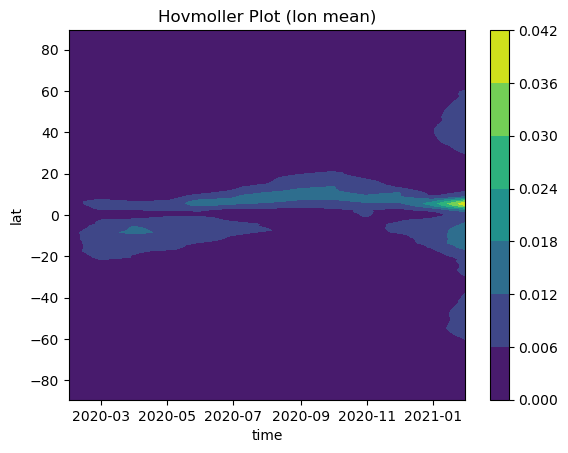

In [31]:
hovmoller_plot(data_pr,dim='lon')